<h2 style = "text-align:center" > Clustering avec <b>scikit-learn</b></h2> 

● **Neural Data Science in Python**
> https://neuraldatascience.io/intro.html

● **MNE** (MEG + EEG Analysis & Visualisation)
> https://mne.tools/stable/index.html
>
> Creating MNE data structures from arbitrary data
>> https://mne.tools/stable/auto_tutorials/io/10_reading_meg_data.html#creating-mne-data-structures-from-arbitrary-data-from-memory

● **EEG preprocessing pipeline**
> https://mne.tools/dev/auto_tutorials/preprocessing/index.html \
https://www.frontiersin.org/articles/10.3389/fninf.2015.00016/full#:~:text=The%20depositable%20preprocessing%20pipeline%20consists,with%20a%20low%20recording%20SNR

● **Preprocessing of EEG**
> https://typeset.io/papers/preprocessing-of-eeg-4go8vhcbty \
https://learn.neurotechedu.com/preprocessing/ \
https://g0rella.github.io/gorella_mwn/preprocessing_eeg.html

● **Z-Score Normalisation**
> https://typeset.io/questions/why-is-z-score-normalisation-necessary-in-pre-processing-eeg-1xv5jepyq5 \
https://fr.wikipedia.org/wiki/Cote_Z_(statistiques)

● **Traitement numérique du signal**
> https://fr.wikipedia.org/wiki/Traitement_num%C3%A9rique_du_signal

● **Ondelette**
> https://fr.wikipedia.org/wiki/Ondelette

● **Maximum de vraisemblance**
> https://pmarchand1.github.io/ECL8202/notes_cours/03-Maximum_vraisemblance.html \
https://fr.wikipedia.org/wiki/Maximum_de_vraisemblance#:~:text=En%20statistique%2C%20l'estimateur%20du,maximisant%20la%20fonction%20de%20vraisemblance

● **Transformation de Fourier discrète**
> https://fr.wikipedia.org/wiki/Transformation_de_Fourier_discr%C3%A8te

● **Divers**
> https://docs.scipy.org/doc/scipy/reference/signal.html \
https://fr.wikipedia.org/wiki/Filtre_de_Butterworth \
https://fr.wikipedia.org/wiki/Moyenne_mobile \
https://terpconnect.umd.edu/~toh/spectrum/Differentiation.html \
https://perso.etis-lab.fr/ghaffari/2014_CCMB_Floride_USA.pdf

● **Digital Filtering - EEG**
> http://notebooks.pluxbiosignals.com/notebooks/Categories/Pre-Process/digital_filtering_eeg_rev.html

In [8]:
%matplotlib inline

from zipfile import ZipFile
import pandas as pd # type: ignore
import numpy as np  # type: ignore
#import os, math  

"""
https://pandas.pydata.org/docs/reference/io.html
"""
def csv_in_zip(fichierZip : str, sous_repertoir : str = '',
               fichiers_specifiques : list = []) -> list[pd.DataFrame] :
    stk = []

    with ZipFile(fichierZip) as myzip :
        filtre = myzip.infolist() if sous_repertoir == '' else \
                 [fic for fic in myzip.infolist() if (sous_repertoir + '/') in fic.filename]

        if fichiers_specifiques != [] :
            fichiers_specifiques = [sous_repertoir + '/' + X for X in fichiers_specifiques]
            filtre = [X for X in filtre if X.filename in fichiers_specifiques]

        for fic in filtre :
            with myzip.open(fic.filename) as f :
                stk.append(pd.read_csv(f, encoding_errors = 'ignore'))

    return stk

"""
https://pandas.pydata.org/docs/reference/io.html
"""
def pkl_in_zip(fichier_zip : str, fichier_specifique : str) -> pd.DataFrame :
     with ZipFile(fichier_zip).open(fichier_specifique) as f :
        return pd.read_pickle(f)

"""
https://fr.wikipedia.org/wiki/Lissage_exponentiel
Lissage exponentiel simple
La moyenne mobile exponentielle permet de lisser une courbe pour mettre en évidence
son allure en supprimer les écarts ponctuels et le bruit.
"""
def Simple_exponential_smoothing(serie : np.array, alpha : float = 1, s0 : float = None) :
    resultat = [serie[0] if s0 is None else s0]
    beta     = 1 - alpha

    for x in serie :
        resultat.append(alpha * x + beta * resultat[-1])

    return resultat

"""
"""
def moving_average(serie : np.array, w : int = 3) :
    resultat = serie.cumsum() / w

    return np.append(np.zeros(w), resultat[w: ] - resultat[: -w])

"""
"""
def simple_thresholding(serie : np.array) -> tuple[float, list] :
    peak = np.max(np.abs(serie))

    return peak, serie / peak

In [10]:
path = "C:/W/DST/mar24_cds_eeg/data/data.zip"

df_train_pkl = pkl_in_zip(path, fichier_specifique = 'epoched_train.pkl')
df_train_csv = csv_in_zip(path, sous_repertoir = 'train', fichiers_specifiques = ['B0101T.csv'])

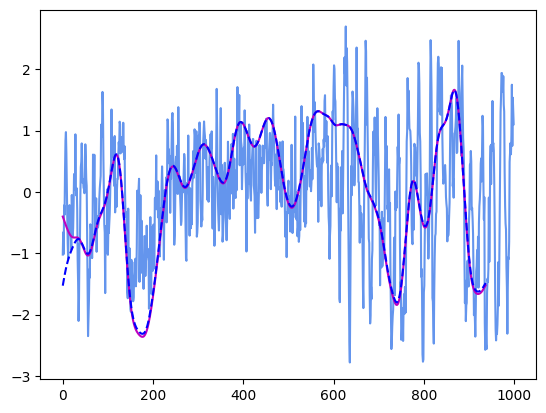

In [157]:
from scipy import signal, fft, stats # type: ignore # , fftfreq

import matplotlib.pyplot as plt # type: ignore
import seaborn as sns           # type: ignore
# import plotly.plotly as py    # type: ignore

sample_rate = 250 # Hz

rw      = df_train_pkl['C3'][0]
rz      = rw.copy()
ro      = rw.copy()
n       = 25
alpha   = 1 / 3.5

for _ in range(n) :
    rz = Simple_exponential_smoothing(rz, alpha, 0)
    ro = Simple_exponential_smoothing(ro, alpha)

recal = int(n / alpha)

plt.plot(stats.zscore(rw), color = 'cornflowerblue')
plt.plot(stats.zscore(rz[recal: ]), 'm')
plt.plot(stats.zscore(ro[recal: ]), '--', color = 'blue') #
plt.show();


# xf = fftfreq(len(rw), 1 / sample_rate)

# sns.displot(kind = 'kde', data = pd.DataFrame(rw))  #, hue = 'flankers'

# plt.plot(stats.zscore(Simple_exponential_smoothing(rw, alpha / n))[int(1 / alpha) * n: ])

# print(simple_thresholding(rw)), '--'

# ls2 = moving_average(rw, 10)
# ls3 = signal.order_filter(rw, np.ones(3), 1)
# ls4 = signal.medfilt(rw)

# print(rw[peaks])

# signal.wiener(rw, noise = 100)

# plt.plot(rw, color = 'silver')
# plt.plot(ls1, 'b')
# plt.plot(ls4, 'g--')

In [158]:
import mne 

root         = mne.datasets.sample.data_path() / "MEG" / "sample"
evoked_file  = root / "sample_audvis-ave.fif"
evokeds_list = mne.read_evokeds(evoked_file, baseline = (None, 0), proj = True, verbose = False)

Using default location ~/mne_data for sample...


100%|######################################| 1.65G/1.65G [00:00<00:00, 196GB/s]
Untarring contents of 'C:\Users\b.luron\mne_data\MNE-sample-data-processed.tar.gz' to 'C:\Users\b.luron\mne_data'


Download complete in 01m50s (1576.2 MB)


In [159]:

for e in evokeds_list :
    print(f"Condition: {e.comment}, baseline: {e.baseline}")

Condition: Left Auditory, baseline: (-0.19979521315838786, 0.0)
Condition: Right Auditory, baseline: (-0.19979521315838786, 0.0)
Condition: Left visual, baseline: (-0.19979521315838786, 0.0)
Condition: Right visual, baseline: (-0.19979521315838786, 0.0)


In [160]:
conds = ("aud/left", "aud/right", "vis/left", "vis/right")
evks  = dict(zip(conds, evokeds_list))

In [170]:
# evks["aud/left"].plot(exclude = [])
# evks["aud/left"].plot(picks = "eeg", spatial_colors = True, gfp = True)

In [169]:
times = np.linspace(0.05, 0.13, 5)
# evks["aud/left"].plot_topomap(ch_type = "eeg", times = times, colorbar = True)

In [168]:
# mags = evks["aud/left"].copy().pick(picks = "mag")

# mne.viz.plot_arrowmap(mags.data[:, 175], mags.info, extrapolate = "local")